# **Support Vector Regression**

SVR has diffrent regression goal as compared to Linear Regression, In Linear Regression we are trying to minimize the error between the prediction and data but in SVR our goal is to make sure that error do not exceed the thresold.

In [50]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Load Dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [52]:
# Seperate data into dependant and independant
dep = 'Salary'
X = dataset.loc[:, dataset.columns != dep]
y = dataset.loc[:, dataset.columns == dep]

In [53]:
# Position and Level both are highly correlated with each other
# so we need to eliminate Posotion column
X = X.loc[:, X.columns != 'Position']

In [54]:
# We need to standardize Each column
# because SVR don't do this for us
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
y_sc = StandardScaler()
X_norm = X_sc.fit_transform(X) 
y_norm = y_sc.fit_transform(y) 

## **Fitting SVR Model**

In [55]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_norm, y_norm.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## **Vizualization**


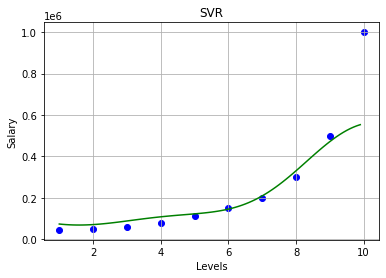

In [58]:
X_grid = np.arange(start=X.min()[0], stop=X.max()[0], step=0.1).reshape(-1,1)
y_pred = y_sc.inverse_transform(regressor.predict(X_sc.transform(X_grid)))
plt.scatter(X, y, color='blue')
plt.plot(X_grid, y_pred, color='green')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.title('SVR')
plt.grid()
plt.show()